<a href="https://colab.research.google.com/github/HanByeonghyun/HanByeonghyun/blob/main/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#합성곱 신경망을 사용한 이미지 분류

In [2]:
#데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
#(48000, 28, 28) -> (48000, 28, 28, 1)로 변경
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

**모델 파라미터 수 계산**

첫 번째 파라미터 수는 (3, 3, 1) 크기의 32개의 필터를 가지고 있음. 필터마다 하나의 절편이 추가됨

따라서 3 * 3  * 1 * 32 * 32 =320

층의 구성을 그림으로 표현

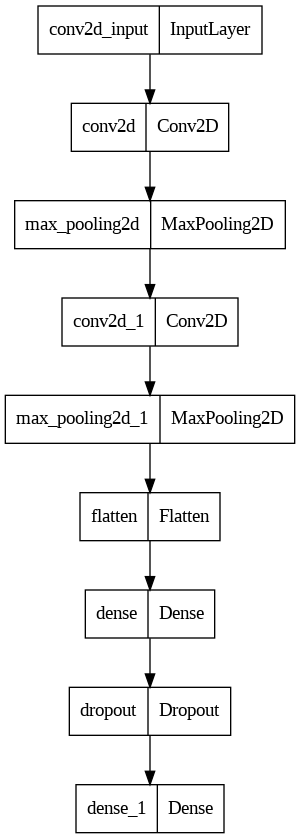

In [5]:
keras.utils.plot_model(model)

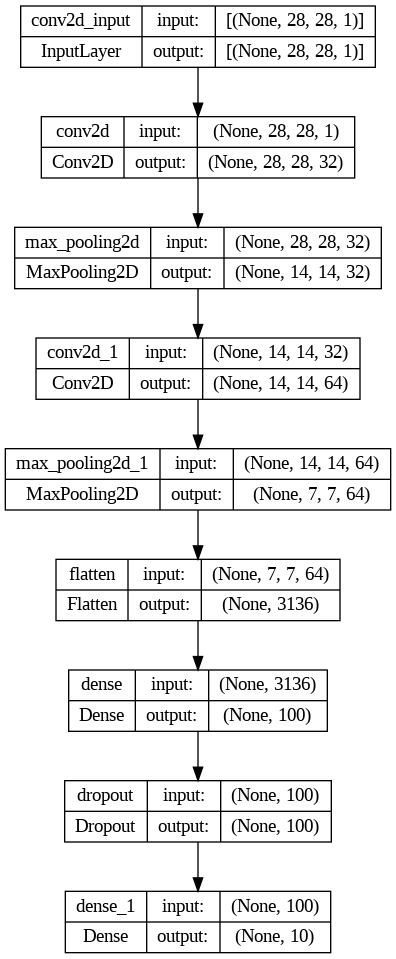

In [6]:
keras.utils.plot_model(model, show_shapes=True)

##모델 컴파일과 훈련

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 20s 6ms/step - loss: 0.5247 - accuracy: 0.8116 - val_loss: 0.3239 - val_accuracy: 0.8811
Epoch 2/20
  30/1500 [..............................] - ETA: 5s - loss: 0.3792 - accuracy: 0.8667

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.3438 - accuracy: 0.8770 - val_loss: 0.2796 - val_accuracy: 0.8970
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2910 - accuracy: 0.8954 - val_loss: 0.2530 - val_accuracy: 0.9075
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2608 - accuracy: 0.9057 - val_loss: 0.2389 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2350 - accuracy: 0.9143 - val_loss: 0.2271 - val_accuracy: 0.9156
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2157 - accuracy: 0.9216 - val_loss: 0.2177 - val_accuracy: 0.9208
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2010 - accuracy: 0.9256 - val_loss: 0.2075 - val_accuracy: 0.9226
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1834 - accuracy: 0.9318 - val_loss: 0.2235 - val_accuracy: 0.9204
Epo

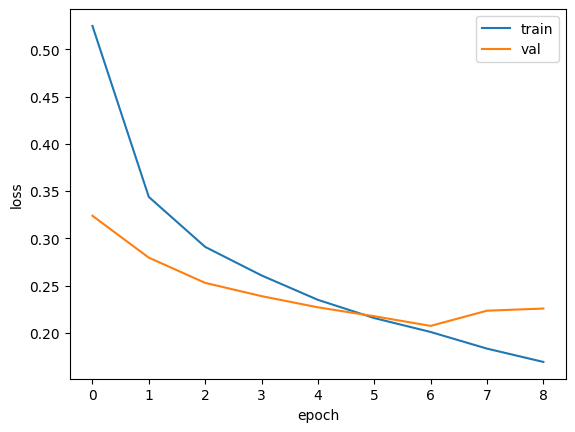

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2075 - accuracy: 0.9226


[0.20748662948608398, 0.9225833415985107]

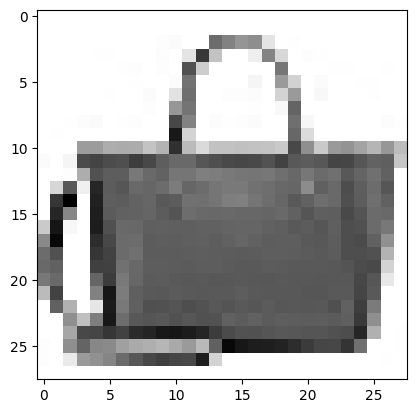

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

첫 번째 검증데이터 예측

In [14]:
#슬라이싱을 해야함 val_scaled[0:1]과 같이
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 146ms/step
[[4.8310401e-15 1.9950589e-23 6.6636181e-17 1.1397013e-18 1.9767841e-14
  2.7902444e-14 3.2168503e-13 4.4478090e-17 1.0000000e+00 5.2086514e-17]]


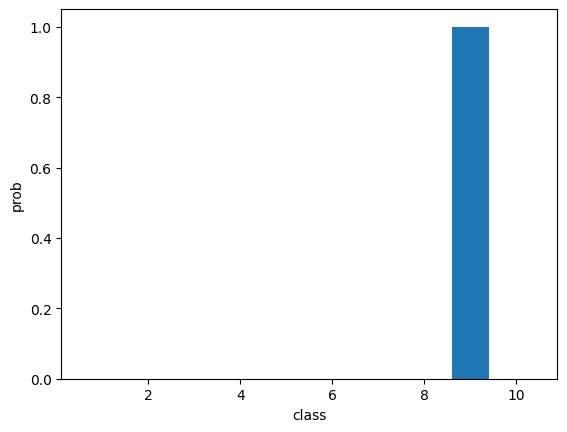

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달',
           '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


테스트 샘플 예측

In [18]:
#정규화
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2290 - accuracy: 0.9199


[0.22903162240982056, 0.9199000000953674]